# LANGKAH 1: BERTANYA

## Background

Bellabeat
adalah perusahaan teknologi tinggi yang memproduksi produk pintar yang berfokus pada kesehatan. Mereka menawarkan hal yang berbeda
perangkat pintar yang mengumpulkan data tentang aktivitas, tidur, stres, dan kesehatan reproduksi untuk memberdayakan perempuan
dengan pengetahuan tentang kesehatan dan kebiasaan mereka sendiri.

Fokus utama dari kasus ini adalah menganalisis data kebugaran perangkat pintar dan menentukan manfaatnya
membuka peluang pertumbuhan baru untuk Bellabeat. Kami akan fokus pada salah satu produk Bellabeat: Bellabeat
aplikasi.

Aplikasi Bellabeat memberi pengguna data kesehatan terkait aktivitas, tidur, stres, siklus menstruasi,
dan kebiasaan perhatian. Data ini dapat membantu pengguna lebih memahami kebiasaan dan perilaku mereka saat ini
keputusan yang sehat. Aplikasi Bellabeat terhubung ke lini produk kesehatan pintar mereka.

## Pemangku Kepentingan

* **Urška Sršen Bellabeat** Salah satu pendiri dan Chief Creative Officer
* **Sando Mur** salah satu pendiri Bellabeat dan anggota kunci tim eksekutif Bellabeat
* **Tim Analisis Pemasaran Bellabeat**

## Tugas Bisnis

Mengingat fakta sebelumnya, tugas bisnis didefinisikan sebagai mencari pola penggunaan pengguna
perangkat pintar untuk mendapatkan wawasan yang nantinya akan mengarahkan keputusan pemasaran dengan lebih baik. Jadi, dalam satu
frasa itu akan menjadi:

Bagaimana pengguna kami menggunakan perangkat pintar kami?. Identifikasi tren bagaimana konsumen menggunakan non
Bellabeat pintar
perangkat untuk menerapkan wawasan ke dalam strategi pemasaran Bellabeat.

# LANGKAH 2: MEMPERSIAPKAN

## Kumpulan data digunakan

Sumber data yang digunakan untuk studi kasus ini adalah
Data Pelacak Kebugaran FitBit. Kumpulan data ini adalah
disimpan di Kaggle dan tersedia
melalui Mobius dan dihasilkan oleh
responden survei terdistribusi melalui
Amazon Mechanical Turk antara
03.12.2016 05.12.2016.

## Aksesibilitas dan privasi data

Data dilisensikan di bawah CC0: Publik
Domain, melepaskan semua haknya
karya di seluruh dunia berdasarkan undang-undang hak cipta,
termasuk semua hak terkait dan hak yang berdekatan,
sampai batas tertentu menurut undang-undang. Pekerjaan itu bisa saja
disalin, dimodifikasi, didistribusikan dan dijalankan
pekerjaan tersebut, meskipun untuk tujuan komersil,
semua tanpa meminta izin

## Organisasi dan verifikasi data

Dataset adalah kumpulan 18 file .csv.
15 dalam format panjang, 3 dalam format lebar. Itu
kumpulan data terdiri dari rentang yang luas
informasi dari metrik aktivitas, kalori,
catatan tidur, setara dengan metabolisme
tugas (METs), detak jantung dan langkah; di dalam
jangka waktu detik, menit, jam dan
hari

## Batasan data

Data ini mempunyai beberapa keterbatasan yang mungkin bisa saja terjadi
Merusak
hasil analisis
Seperti
keterbatasan yang perlu dipertimbangkan
adalah:
* Demografi tidak ada
* Ukuran sederhana kecil
* Jangka waktu pengumpulan data yang singkat

# LANGKAH 3: PROSES

## Library
- Library: Kumpulan kode/function buatan orang lain yang bisa kita pakai
- Biasanya disimpan di file .py terpisah atau didownload dari PyPI.
- Untuk mendownload library dari PyPI, bisa menggunakan `!pip install <nama library>`

**CONTOH**
Kami akan mendownload file ini:

https://drive.google.com/file/d/1W6TlKgcc_Rkl7IJaiTVOqj3cFbaXiMFQ/view?usp=sharing

Untuk mendownload data dari Google Drive, kita akan menggunakan library `gdown`

In [ ]:
!pip install gdown

In [ ]:
import gdown

In [ ]:
url = "https://drive.google.com/file/d/1W6TlKgcc_Rkl7IJaiTVOqj3cFbaXiMFQ/view?usp=sharing"
output = 'dailyActivity_merged.csv'
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1W6TlKgcc_Rkl7IJaiTVOqj3cFbaXiMFQ
To: /content/dailyActivity_merged.csv
100%|██████████| 111k/111k [00:00<00:00, 2.84MB/s]


'dailyActivity_merged.csv'

In [ ]:
import numpy as np # untuk penggunaan linear algebra
import pandas as pd # data processing, membaca CSV file
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

from pandas.api.types import CategoricalDtype

## Import Dataset

Pertama, mari impor kumpulan data 'dailyActivity_merged.csv' menggunakan fungsi pandas pd.read_csv()

In [ ]:
df = pd.read_csv("dailyActivity_merged.csv")

## Eksplorasi data

Setelah diunggah, pertama-tama mari kita lihat berapa banyak kolom dan baris yang kita miliki, menggunakan fungsi pandas, .shape

In [ ]:
df.shape

(940, 15)

Bisa kita lihat, kita memiliki 940 baris dan 15 kolom. mari kita lihat nama kolomnya, menggunakan fungsi panda .columns

In [ ]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

Mengetahui nama kolom, mari kita lihat sekilas baris dan datanya, menggunakan fungsi pandas .head()

In [ ]:
df.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


Kumpulan data menyimpan dan melacak data yang dikumpulkan setiap hari, oleh perangkat pelacakan FitBit Fitness, seperti jam tangan pintar dan/atau aplikasi kebugaran.
Dari tampilan singkat kita dapat meringkas kolom sebagai berikut:
* Id: adalah pengidentifikasi unik pengguna dalam survei
* ActivityDate: adalah tanggal spesifik entri
* TotalSteps: total langkah yang dilakukan setiap pengguna setiap hari
* TotalDistance: total jarak yang dilakukan setiap pengguna setiap hari
* TrackerDistance: adalah jarak yang dilacak perangkat setiap hari
* LoggedActivitiesDistance: adalah jarak yang dilacak oleh perangkat pada aktivitas tertentu
* VeryActiveDistance: Jarak yang ditempuh pada kondisi fisik yang sangat aktif?
* ModeratelyActiveDistance: Jarak yang ditempuh pada kondisi fisik yang cukup aktif?
* LightActiveDistance: Jarak yang ditempuh pada kondisi fisik aktif ringan?
* SedentaryActiveDistance: Jarak yang ditempuh dalam keadaan fisik aktif yang tidak banyak bergerak?
* VeryActiveMinutes: Menit yang dihabiskan dalam kondisi fisik yang sangat aktif?
* FairlyActiveMinutes: Menit yang dihabiskan dalam kondisi fisik yang cukup aktif?
* LightlyActiveMinutes: Menit yang dihabiskan dalam kondisi fisik ringan aktif?
* SedentaryMinutes: Menit yang dihabiskan dalam kondisi fisik ringan aktif?
* Kalori: Kalori yang terbakar pada hari tertentu

Setelah melihat kolom dan datanya, kita dapat membintangi proses pembersihan

## Membersihkan Data

### Memeriksa tipe Data

Pertama kita harus memeriksa apakah tipe datanya sesuai dengan konten dan tujuan data di setiap kolom, kita bisa menggunakan fungsi .dtypes untuk itu

In [ ]:
df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

Kita dapat melihat bahwa kolom Id adalah bilangan bulat, tetapi dalam contoh ini harus berupa string atau objek, mengapa? karena Id hanyalah pengidentifikasi, dan tujuan kami bukan untuk melakukan operasi matematika, penjumlahan, perkalian, dll.

Kolom ActivityDate juga merupakan objek dan harus berupa Tanggal.
Selain itu semua kolom lainnya tampaknya merupakan tipe data yang benar

In [ ]:
df['Id'] = df['Id'].astype(str)
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'],format="%m/%d/%Y")
df.dtypes # Setelah direformasi. Kami memeriksa ulang tipe datanya

Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

Sekarang kita periksa format sebelumnya dan kita akan mengubah kolom Id dari int menjadi str menggunakan fungsi .astype(str), dan kolom 'ActivityDate' dari objek atau string, menjadi datetime

### Memeriksa nilai kolom

Setelah itu kita bisa membuang kolom-kolom yang tidak relevan dengan analisa kita.
Pertama kita catat kolom 'TotalDistance', dan kolom lainnya yang berhubungan dengan pelacakan jarak.
Sekilas kami melihat bahwa 'TotalDistance' dan 'Tracker Distance' memiliki nilai yang serupa, namun kami tidak yakin.
Kita juga bisa berasumsi bahwa 'TrackerDistance' atau 'TotalDistance' adalah jumlah dari kolom "*ActiveDistance" yang berbeda, kita mungkin salah jadi kita periksa dulu.

In [ ]:
# Kami membuat kolom baru, menambahkan "ActiveDistance" kolom untuk melihat apakah itu sama dengan 'TotalDistance' column, atau 'TrackerDistance' column
df['sum_distance'] = df['VeryActiveDistance'] + df['ModeratelyActiveDistance'] + df['LightActiveDistance'] + df['SedentaryActiveDistance']

# Kami juga memperhatikan hal 'LoggedActivitiesDistance' memiliki nilai 0,0 di sebagian besar entri, tetapi kami memfilter untuk menemukan yang memiliki lebih dari 0
df.loc[(df['LoggedActivitiesDistance'] > 0),['TotalDistance','TrackerDistance','LoggedActivitiesDistance','sum_distance']]

,TotalDistance,TrackerDistance,LoggedActivitiesDistance,sum_distance
668,5.27,5.27,1.959596,5.08
689,9.71,7.88,4.081692,9.71
693,9.27,9.08,2.785175,9.26
707,8.72,8.68,3.167822,8.73
711,10.29,9.48,4.869783,10.29
712,9.65,8.60,4.851307,9.65
713,8.24,7.48,3.285415,8.25
717,10.98,9.91,4.930550,10.98
718,10.48,9.50,4.942142,10.48
719,11.31,10.41,4.924841,11.32


Temuan sebelumnya menunjukkan bahwa meskipun 'TotalDistance' dan 'TrackerDistance' tidak selalu 100% sama, dalam banyak kasus keduanya sama.
Kami juga melihat bahwa ada entri dalam 'LoggedActivitiesDistance' yang lebih tinggi dari 0, namun hanya sedikit.
Dan terakhir kita melihat bahwa jumlah kolom 'ActiveDistance' sama dengan kolom 'TotalDistance', hanya berbeda 1 desimal karena pembulatan ke atas.

Jadi sekarang, kita harus memutuskan apakah kita ingin mempertahankan semua kolom, atau menghapus beberapa, kita menyimpulkan bahwa kolom 'TotalDistance' dan 'TotalDistance' sama dalam banyak kasus, (memiliki nilai TotalDistance lebih tinggi). jadi kami memutuskan untuk mempertahankan 'TotalDistance'.

Tentang kolom 'ActiveDistance', sayangnya kami tidak memiliki gambaran di balik kategorisasi tersebut, apa sebenarnya perbedaan antara 'Aktif Sedang' dan 'Sangat Aktif', mungkin detak jantung saat itu?, langkah per menit?, kami tidak tahu dari kumpulan data khusus ini, namun kami akan tetap menyimpannya.

Hal yang sama dapat dikatakan tentang kolom 'ActiveMinutes', jadi kami hanya akan menambahkannya di kolom baru

In [ ]:
df['TotalMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes'] + df['SedentaryMinutes']

### Mengganti nama kolom

Sekarang, mari kita ganti nama kolom dengan fungsi rename.
Dan kami juga ingin mengubahnya menjadi huruf kecil dengan fungsi str.lower()

In [ ]:
df.columns = df.columns.str.lower()
df.rename(columns = {'trackerdistance':'tracker_distance','activitydate':'activity_date','totalsteps':'total_steps','totaldistance':'total_distance',
       'loggedactivitiesdistance':'logged_activities_distance', 'veryactivedistance':'very_active_distance',
       'moderatelyactivedistance':'moderately_active_distance', 'lightactivedistance':'light_active_distance',
       'sedentaryactivedistance':'sedentary_active_distance', 'veryactiveminutes':'very_active_minutes',
       'fairlyactiveminutes':'fairly_active_minutes','lightlyactiveminutes':'lightly_active_minutes',
       'sedentaryminutes':'sedentary_minutes'}
         ,inplace=True) # Kami membuat perubahan permanen dengan menggunakan inplace=True
print('Double check the name of the columns:')
df.columns

Double check the name of the columns:


Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       'sum_distance', 'totalminutes'],
      dtype='object')

### Membuat kolom

Mari tambahkan kolom yang memberi tahu kita hari dalam seminggu menggunakan fungsi tanggal dan waktu hari_nama(), dan kolom lain dengan nomor hari dalam seminggu, menggunakan fungsi hari kerja

In [ ]:
day_of_week = df['activity_date'].dt.day_name()
df['day_of_week'] = day_of_week
df['n_day_of_week'] = df['activity_date'].dt.weekday # 0 melambangkan senin, 6 melambangkan minggu

### Memeriksa sel kosong dan nilai nol

Memeriksa nilai null dengan fungsi isna().sum()

In [ ]:
print('Total number of null values are: ')
print(df.isna().sum())

Total number of null values are: 
id                            0
activity_date                 0
total_steps                   0
total_distance                0
tracker_distance              0
logged_activities_distance    0
very_active_distance          0
moderately_active_distance    0
light_active_distance         0
sedentary_active_distance     0
very_active_minutes           0
fairly_active_minutes         0
lightly_active_minutes        0
sedentary_minutes             0
calories                      0
sum_distance                  0
totalminutes                  0
day_of_week                   0
n_day_of_week                 0
dtype: int64


Memeriksa entri duplikat menggunakan fungsi duplikasi().sum()

In [ ]:
print('Total number of duplicated values are: ',df.duplicated().sum())

Total number of duplicated values are:  0


Tidak ada nilai nol atau entri duplikat

### Subsetting data

Sekarang kita hanya dapat memilih kolom yang akan kita gunakan untuk analisis kita. Pada kasus ini

In [ ]:
df = df[['id', 'activity_date', 'total_steps', 'total_distance',
       #'tracker_distance', 'logged_activities_distance',
       #'very_active_distance', 'moderately_active_distance',
       #'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       #'sum_distance','totalminutes',
       'day_of_week', 'n_day_of_week'
        ]].copy()

### Pembuatan kategori

Sekarang saya akan membuat kategorisasi pengguna saya sendiri, berdasarkan tingkat aktivitas fisik dan penggunaan perangkat

aktivitas fisik akan mengikuti argumen berikut:
* Menetap: rata-rata kurang dari 6000 langkah setiap hari
* Aktif: rata-rata antara 6000 dan 12000 langkah setiap hari
* Sangat aktif: rata-rata lebih dari 12.000 langkah setiap hari

Penggunaan perangkat akan mengikuti argumen berikut:
* Penggunaan rendah: penggunaan kurang dari 8 jam per hari.
* Penggunaan normal: antara 8 dan 16 jam penggunaan per hari.
* Penggunaan tinggi: lebih dari 16 jam penggunaan per hari.

Untuk kumpulan data ini, saya hanya akan memulai dengan membuat kategori 'tingkat_aktivitas'.
Saya akan membuat kategori lain ketika saya menganalisis kumpulan data yang datanya disimpan setiap jam

In [ ]:
# Saya pertama-tama mengelompokkan data berdasarkan id
id_grp = df.groupby(['id'])

# Lalu saya mencari jumlah rata-rata langkahnya, dan mengurutkan hasilnya dalam urutan menurun
id_avg_step = id_grp['total_steps'].mean().sort_values(ascending=False)

# Setelah itu saya ubah hasilnya menjadi dataframe
id_avg_step = id_avg_step.to_frame()

# Saya ingin membuat kolom baru yang menunjukkan kategori mana yang cocok untuk setiap pengguna, bergantung pada jumlah rata-rata langkah
conditions = [
    (id_avg_step <=6000),
    (id_avg_step > 6000) & (id_avg_step < 12000),
    (id_avg_step >= 12000)
] # Inilah syarat-syaratnya

values = ['sedentary','active','very_active'] # Dan inilah nama nilainya

# Saya membuat kolom dengan fungsi numpy, np.select untuk menetapkan setiap id sebuah kategori
id_avg_step['activity_level'] = np.select(conditions,values)

# Saya menyimpan hasilnya dalam variabel untuk digunakan pada langkah berikutnya
id_activity_level = id_avg_step['activity_level']

# Saya menggunakan pemahaman daftar untuk membuat kolom di kumpulan data asli kami.
# Dengan pemahaman daftar ini saya mengambil kategori yang indeksnya cocok dengan kolom id
df['activity_level'] = [id_activity_level[c] for c in df['id']]

# LANGKAH 4: ANALISIS

Mari kita periksa berapa banyak id unik yang ada dengan fungsi nunique().
Dan apa saja yang memiliki fungsi unik()

In [ ]:
print('Number of unique values in id column:',df['id'].nunique())
print()
print('List of id values:',df['id'].unique())

Number of unique values in id column: 33

List of id values: ['1503960366' '1624580081' '1644430081' '1844505072' '1927972279'
 '2022484408' '2026352035' '2320127002' '2347167796' '2873212765'
 '3372868164' '3977333714' '4020332650' '4057192912' '4319703577'
 '4388161847' '4445114986' '4558609924' '4702921684' '5553957443'
 '5577150313' '6117666160' '6290855005' '6775888955' '6962181067'
 '7007744171' '7086361926' '8053475328' '8253242879' '8378563200'
 '8583815059' '8792009665' '8877689391']


dan sekarang mari kita lihat seberapa banyak mereka muncul di dataset dengan value_counts()

In [ ]:
print('How many times each id appear in the dataset?')
print(df['id'].value_counts())

How many times each id appear in the dataset?
1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: id, dtype: int64


Seperti yang bisa kita lihat, ada 33 id atau pengguna unik, dan sebagian besar muncul 31 kali di seluruh dataset, ada pula yang kurang dari itu

Sekarang mari kita periksa kolom tanggal, berapa tanggal minimum, tanggal maksimum, hari di antara keduanya, dan jumlah tanggal unik

In [ ]:
print('The min date is:',min(df['activity_date']))
print('The max date is:',max(df['activity_date']))
print('The number of unique dates are:',df['activity_date'].nunique())

The min date is: 2016-04-12 00:00:00
The max date is: 2016-05-12 00:00:00
The number of unique dates are: 31


Seperti yang bisa kita lihat, kita punya waktu tepat 31 hari, mulai dari '12-04-2016' hingga '12-05-2016'

Sekarang kita bisa mulai melakukan analisis data eksplorasi

In [ ]:
# Pertama kita menggunakan fungsi describe() untuk melihat beberapa statistik
df.describe()

,total_steps,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,n_day_of_week
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,7637.910638,5.489702,21.164894,13.564894,192.812766,991.210638,2303.609574,2.918085
std,5087.150742,3.924606,32.844803,19.987404,109.174700,301.267437,718.166862,1.942379
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3789.750000,2.620000,0.000000,0.000000,127.000000,729.750000,1828.500000,1.000000
50%,7405.500000,5.245000,4.000000,6.000000,199.000000,1057.500000,2134.000000,3.000000
75%,10727.000000,7.712500,32.000000,19.000000,264.000000,1229.500000,2793.250000,5.000000
max,36019.000000,28.030001,210.000000,143.000000,518.000000,1440.000000,4900.000000,6.000000


Di sini kita bisa melihat mean atau rata-rata, nilai min dan max. median 50%, dll.

Kita sudah bisa melihat di baris maksimal seseorang berjalan sejauh 28 mil dan seseorang membakar 4900 kalori, itu bisa jadi merupakan outlier jadi kita bisa memperhatikannya nanti.

# LANGKAH 5: BAGIKAN

## Korelasi antara langkah kalori dan kalori

Apa korelasi antara jumlah langkah yang dilakukan dan jumlah kalori yang terbakar?

In [ ]:
ax =sns.scatterplot(x='total_steps', y='calories', data=df, hue='activity_level')

#handles, labels = ax.get_legend_handles_labels()
#plt.legend(handles, day_of_week, fontsize=7)
plt.title('Correlation Calories vs. Steps')

plt.show()

ValueError: ignored

Kita dapat melihat korelasi yang agak positif dalam diagram sebar ini, semakin banyak langkah yang dilakukan, semakin banyak kalori yang terbakar.
Kami juga membagi titik-titik berdasarkan warna, menggunakan kategori tingkat_aktivitas, sehingga kami dapat melihat kelompok mana yang mewakili data yang ditampilkan

## Rata-rata jumlah langkah per hari

Berapa rata-rata jumlah langkah per hari?

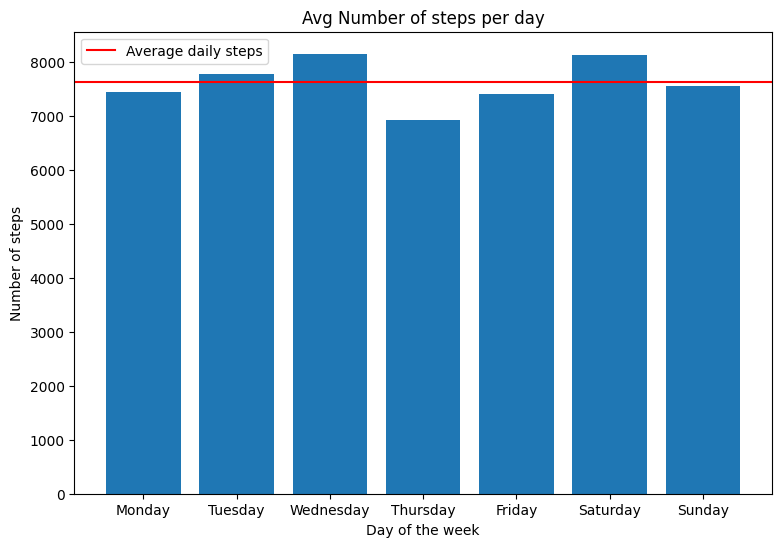

In [ ]:
day_of_week = ['Monday','Tuesday','Wednesday','Thursday', 'Friday','Saturday','Sunday']
fig, ax =plt.subplots(1,1,figsize=(9,6))

day_grp = df.groupby(['day_of_week'])
avg_daily_steps= day_grp['total_steps'].mean()
avg_steps = df['total_steps'].mean()

plt.bar(avg_daily_steps.index,avg_daily_steps)

ax.set_xticks(range(len(day_of_week)))
ax.set_xticklabels(day_of_week)

ax.axhline(y=avg_daily_steps.mean(),color='red', label='Average daily steps')
ax.set_ylabel('Number of steps')
ax.set_xlabel('Day of the week')
ax.set_title('Avg Number of steps per day')

plt.legend()
plt.show()

Hasilnya menunjukkan bahwa Senin, Selasa, dan Sabtu adalah hari-hari di mana pengguna lebih aktif secara fisik dan jumlah langkahnya di atas rata-rata secara keseluruhan.
Rabu, Kamis, dan Jumat berada di bawah rata-rata namun ketiganya turun dalam area yang sama.
Hari Minggu adalah hari yang paling tidak aktif dari semua hari kerja.

Dengan informasi ini kami dapat menafsirkan bahwa pengguna cenderung lebih aktif secara fisik pada hari-hari pertama dalam seminggu dan pada hari Sabtu, sehingga memberi kami petunjuk tentang aktivitas yang mungkin mereka lakukan.

## Persentase aktivitas dalam hitungan menit

Berapa persentase orang yang aktif?

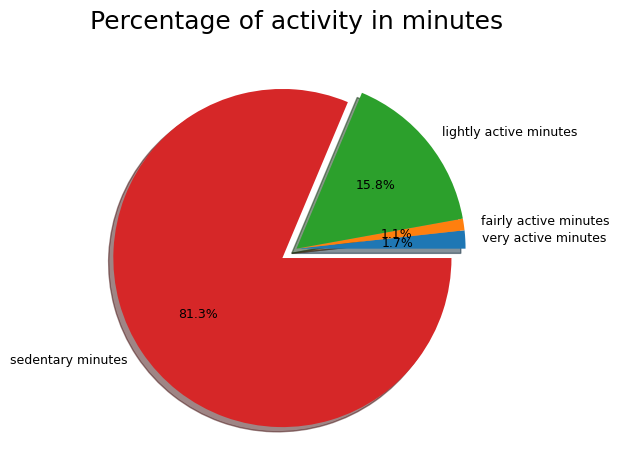

In [ ]:
very_active_mins = df['very_active_minutes'].sum()
fairly_active_mins = df['fairly_active_minutes'].sum()
lightly_active_mins = df['lightly_active_minutes'].sum()
sedentary_mins = df['sedentary_minutes'].sum()

slices = [very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins]
labels = ['very active minutes','fairly active minutes','lightly active minutes','sedentary minutes']
explode = [0,0,0,0.1]
plt.pie(slices, labels = labels, explode = explode, autopct='%1.1f%%',textprops=dict(size=9), shadow=True)

plt.title('Percentage of activity in minutes',fontsize=18)
plt.tight_layout()

plt.show()

Diagram lingkaran ini menunjukkan bahwa sebagian besar pengguna berada dalam kondisi aktivitas menetap, seperenam waktunya melakukan aktivitas ringan, dan hanya 2% dari waktu tersebut aktif melakukan olahraga yang benar.

## Korelasi Antara menit tingkat aktivitas dan kalori

ValueError: ignored

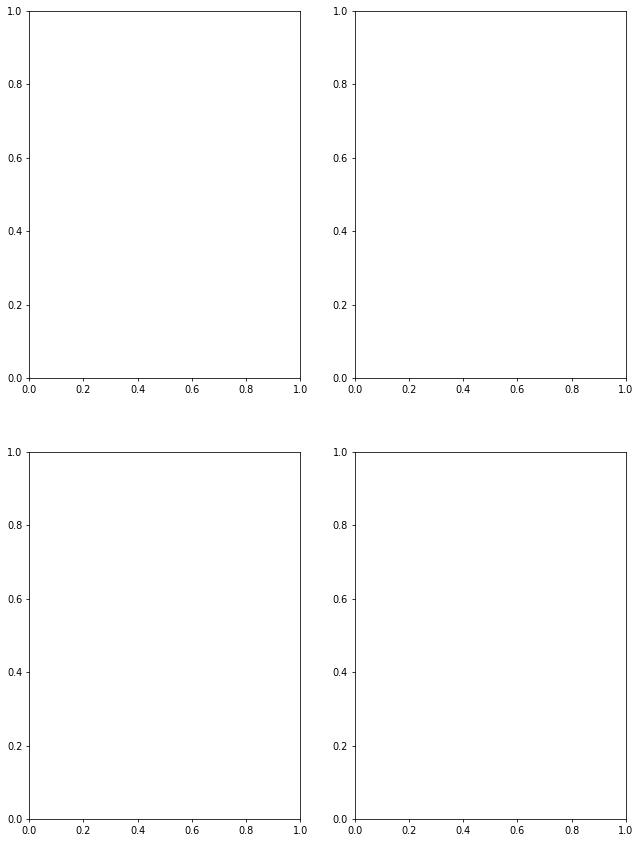

In [ ]:
n_day_of_week = [0,1,2,3,4,5,6]

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(11,15),dpi=70)

sns.scatterplot(data=df,x='calories',y='sedentary_minutes',hue='activity_level',ax=axes[0,0],legend=False)

sns.scatterplot(data=df,x='calories',y='lightly_active_minutes',hue='activity_level',ax=axes[0,1],legend=False)

sns.scatterplot(data=df,x='calories',y='fairly_active_minutes',hue='activity_level',ax=axes[1,0],legend=False)

sns.scatterplot(data=df,x='calories',y='very_active_minutes',hue='activity_level',ax=axes[1,1])


plt.legend(title='Activity level',title_fontsize=20,bbox_to_anchor=(1.8,2.2),fontsize=18,frameon=True,scatterpoints=1)
fig.suptitle('Correlation Between activity level minutes and calories',x=0.5,y=0.92,fontsize=24)
plt.show()

# LANGKAH 6: BERTINDAK

Setelah
menganalisis Data Pelacak Kebugaran FitBit,
kami telah menemukan beberapa wawasan yang bisa membantu
membantu mempengaruhi strategi pemasaran Bellabeat

## Perangkat serbaguna

Bellabeat
dapat memberi tahu pengguna, bahwa produk mereka tidak
hanya dimaksudkan untuk olah raga, atau aktivitas yang berhubungan dengan olahraga As
data menunjukkan, banyak pengguna menghabiskan lebih banyak waktu untuk memakainya
alat pelacak pada akhir pekan dibandingkan pada hari kerja, ini
bisa berarti bahwa mereka menghubungkan produk tersebut hanya dengan olahraga
atau hanya jalan-jalan biasa ke taman di hari Minggu
Bellabeat dapat menunjukkan bahwa produk mereka memang dimaksudkan untuk itu
menemani mereka kemanapun mereka pergi setiap hari
aktivitas, seperti bekerja Dan bantu mereka melacak
informasi untuk meningkatkan kebugaran dan kesehatan secara keseluruhan ini
akan mendorong perempuan dari beragam demografi
fitur dan latar belakang untuk menggunakan produk Bellabeat
ditujukan untuk semua wanita yang peduli dengan kesehatan secara keseluruhan

## Hadiah dan pengingat
Bellabeat
dapat mengintegrasikan fungsi dalam bellabeat
aplikasi atau produk lainnya, seperti imbalan atau insentif,
dan mengingatkan untuk mendorong penggunanya mencapai tujuan tertentu
nilai Nilai ini bisa mencapai nilai minimum
jumlah 7.500 langkah per hari, pembakaran kalori tertentu
untuk orang yang ingin menurunkan berat badan, atau tidur 8 jam
pola Imbalan tertentu dapat terlihat a
papan peringkat pengguna teratas yang telah mencapai dan
mempertahankan langkah minimum sehari lebih lama, secara virtual
medali atau hadiah, seperti diskon atau penawaran Untuk
Mengingatkan sebagian, Bellabeat dapat mengirimkan notifikasi ke mereka
pengguna ketika mereka tertinggal dalam tujuan tersebut, dan
juga dapat menawarkan rekomendasi kepada penggunanya untuk membantu
mereka dengan tidur mereka, atau mencapai tujuan mereka